In [5]:
%matplotlib notebook
# starter code
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance
from networkx.drawing.nx_agraph import graphviz_layout

from ic import simulate_cascade, observe_cascade, get_gvs, get_o2src_time, get_infection_time, gen_nontrivial_cascade
from utils import get_rank_index

gtype = 'balanced-tree'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.2

gvs = get_gvs(g, p, N2)
pos = graphviz_layout(gnx, root=0)

In [6]:
import random
seed = 12345
random.seed(seed)
np.random.seed(seed)

In [7]:
from mwu import mwu
infection_times, source, obs_nodes = gen_nontrivial_cascade(
    g, p, q)
print('cascade size {}'.format(len(obs_nodes)))
r, q_log, mu_log, is_nbr_log = mwu(g, gvs,
        source, obs_nodes, infection_times, o2src_time=None,
        active_method='max_mu',
        reward_method='dist',
        eps=0.2,
        use_uninfected=True,
        debug=True, save_log=True)

 50%|█████     | 1/2 [00:00<00:00,  6.06it/s]

cascade size 2


100%|██████████| 2/2 [00:00<00:00,  6.60it/s]
0it [00:00, ?it/s]/home/cloud-user/code/source_finding/rewards.py:22: RuntimeWarning: invalid value encountered in true_divide
  / counts)
1it [00:00, 807.68it/s]


t1=1, t2=3
source reward: 1.00
query 26
using pairs to update sll
source reward (without smoothing): 1.00
max reward: 1.0
new sll[source] = 0.08390390880346296
source reward (without smoothing): 1.00
max reward: 1.0
new sll[source] = 0.09808931451040825
add q to ref_nodes (#nodes=3)
source current rank = 0, 0.10
checking source 26 with winner 26
winner's time 0
winner's nbr infection time [1, 1, -1]
**Found source and used 4 queries


In [ ]:
bad_examples = []
counts = []
for i in tqdm(range(100)):
    infection_times, source, obs_nodes = gen_nontrivial_cascade(
        g, p, q)
    c = mwu(g, gvs,
            source, obs_nodes, infection_times, o2src_time=None,
            active_method='max_mu',
            reward_method='dist',
            eps=0.2,
            use_uninfected=True,
            debug=False, save_log=False)
    if c > 60:
        bad_examples.append((infection_times, source, obs_nodes))
    counts.append(c)

  0%|          | 0/100 [00:00<?, ?it/s]/home/cloud-user/code/source_finding/rewards.py:22: RuntimeWarning: invalid value encountered in true_divide
  / counts)
  9%|▉         | 9/100 [00:04<00:33,  2.71it/s]/home/cloud-user/code/source_finding/rewards.py:29: RuntimeWarning: invalid value encountered in true_divide
  / (np.absolute(len1 + len2)))
 16%|█▌        | 16/100 [00:15<03:26,  2.46s/it]

no more nodes to query


 23%|██▎       | 23/100 [00:26<03:12,  2.50s/it]

no more nodes to query


 32%|███▏      | 32/100 [00:39<02:58,  2.62s/it]

no more nodes to query


 35%|███▌      | 35/100 [00:50<04:05,  3.78s/it]

no more nodes to query


 36%|███▌      | 36/100 [00:57<05:11,  4.87s/it]

no more nodes to query


 40%|████      | 40/100 [00:59<01:28,  1.47s/it]

In [ ]:
infection_times, source, obs_nodes = bad_examples[0]
r, q_log, mu_log, is_nbr_log = mwu(g, gvs,
        source, obs_nodes, infection_times, o2src_time=None,
        active_method='max_mu',
        reward_method='dist',
        eps=0.2,
        use_uninfected=True,
        debug=True, save_log=True)

<IPython.core.display.Javascript object>


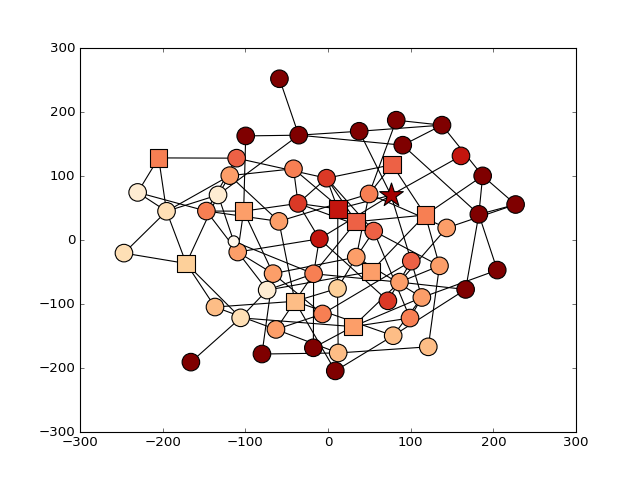

In [4]:
from plot_utils import plot_snapshot
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source)

In [ ]:
from experiment_utils import counts_to_stat
counts_to_stat(counts)

In [ ]:
infection_times[q_log]